# Loading Dataset

In [1]:
import pandas as pd
dataset = pd.read_csv("heart.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
print(dataset.shape)

(303, 14)


# Data Exploration

In [3]:
dataset['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

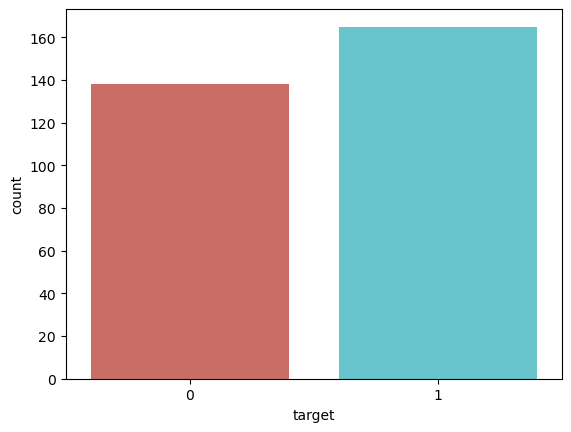

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x = 'target', data = dataset, palette = 'hls')
plt.show()

In [5]:
X = pd.DataFrame(dataset.iloc[:,:-1])
y = pd.DataFrame(dataset.iloc[:,-1])

In [6]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [10]:
y.head()

,target
0,1
1,1
2,1
3,1
4,1


In [11]:
y.shape

(303, 1)

# Splitting of Data

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1)

# Create and Train the Model

In [9]:
# Import module for fitting
from sklearn.linear_model import LogisticRegression

# Create instance (i.e. object) of Logistic Regression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predicting the test set results

In [12]:
y_pred = logmodel.predict(X_test)

# Calculating the accuracy

In [13]:
print('Accuracy: %d', (logmodel.score(X_test, y_test)))

Accuracy: %d 0.7704918032786885


# Evaluating the model using Confusion Matrix

In [14]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[20 10]
 [ 4 27]]


# ROC Curve

In [ ]:
'''Receiver operating characteristics (ROC) curves are graphs showing classifiers' performance 
by plotting the true positive rate and false positive rate. The area under the ROC curve (AUC) measures 
the performance of machine learning algorithms.'''

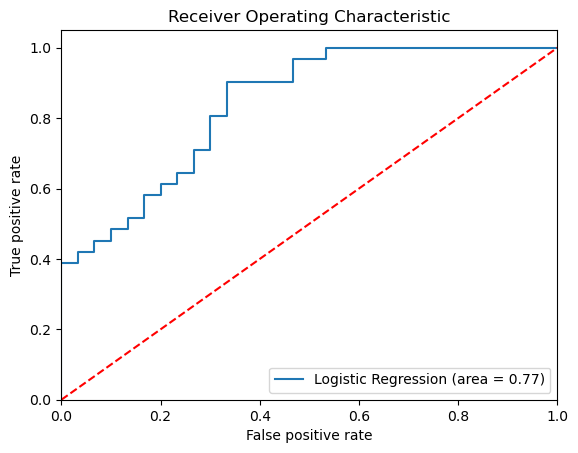

In [18]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logmodel.predict(X_test))
fpr, tpr, threshold = roc_curve(y_test, logmodel.predict_proba(X_test)[:,-1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)'%logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc= "lower right")
plt.savefig('Log_ROC')
plt.show()